In [4]:
getwd()
library(ggplot2)

[1] "/Users/miguela.monreal/CodigosVisInfo/ExamenFinal"

# Primer pregunta
carga y lectura de archivo

In [2]:
canalesMkt <- read.csv("DatosCampaniasMkt.csv")
head(canalesMkt,3)

,TV,TVCAT,Radio,Social_Media,Sales,Influencer
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,16,Low,6.566231,2.907983,54.73276,Mega
2,13,Low,9.237765,2.409567,46.67790,Mega
3,41,Med,15.886446,2.913410,150.17783,Macro


# Pregunta 2
Realizar la boxplot de TVCAT vs Sales

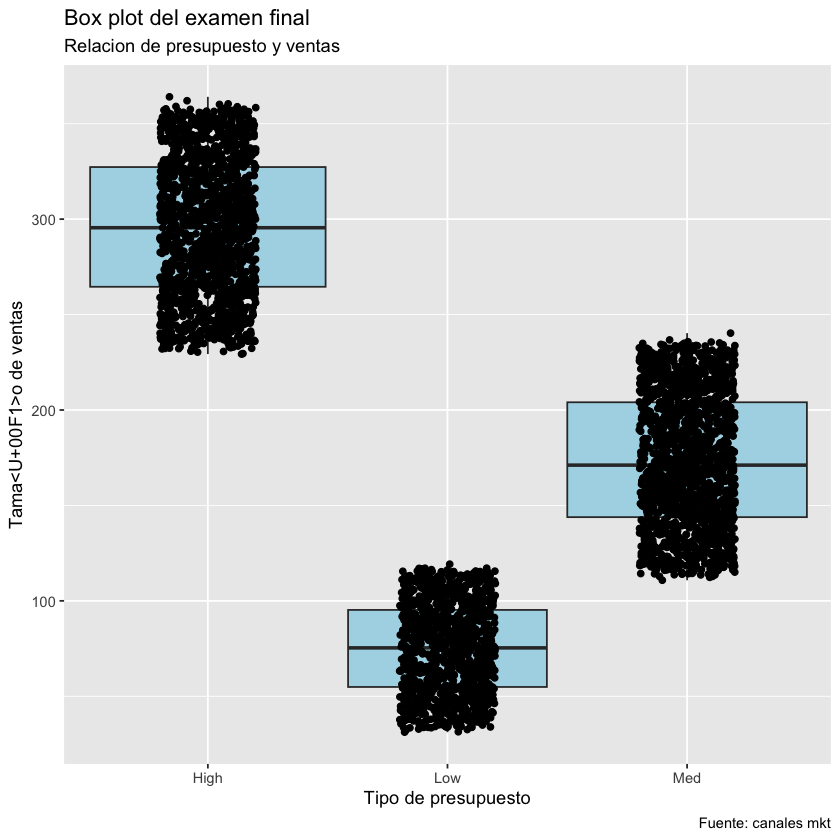

In [30]:
miGraf <- ggplot(canalesMkt, aes(TVCAT, Sales))
p1 <- miGraf + geom_boxplot(varwidth = T, width= 1,fill = "lightblue")+
    layer(
    data=canalesMkt,
    mapping=aes(x=TVCAT, y=Sales),
    ,stat="identity",
    geom="point",
     list(color="red", fill="red", alpha=0.5),
    ,position=position_jitter(width=0.2,height=0)
    
    )+labs(
        title = "Box plot del examen final",
        subtitle = "Relacion de presupuesto y ventas",
        caption = "Fuente: canales mkt",
        x = "Tipo de presupuesto",
        y = "Tamaño de ventas"
    )
plot(p1)


## Respuestas:
El presupuesto mayor es el que tiene mayor impacto en las ventas mientras que las diferencias estadisticas no son muy notorias

# Pregunta 2 segunda parte

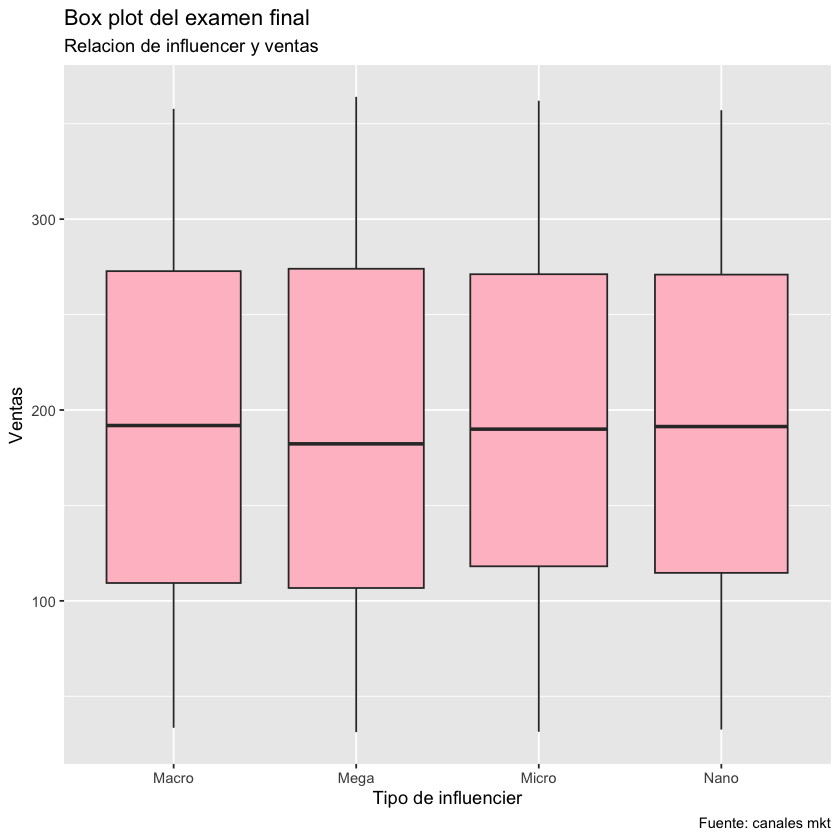

In [33]:
miGraf <- ggplot(canalesMkt, aes(Influencer, Sales))
p1 <- miGraf + geom_boxplot(varwidth = T, fill = "pink") +
    labs(
        title = "Box plot del examen final",
        subtitle = "Relacion de influencer y ventas",
        caption = "Fuente: canales mkt",
        x = "Tipo de influencier",
        y = "Ventas"
    )
plot(p1)


# Respuestas pregunta
No nos conviene hacer campañas con mega influencer, su comportamiento no difere de el resto. Las diferencias estadisticas no son muy notorias 

## Pregunta 3

`geom_smooth()` using formula = 'y ~ x'


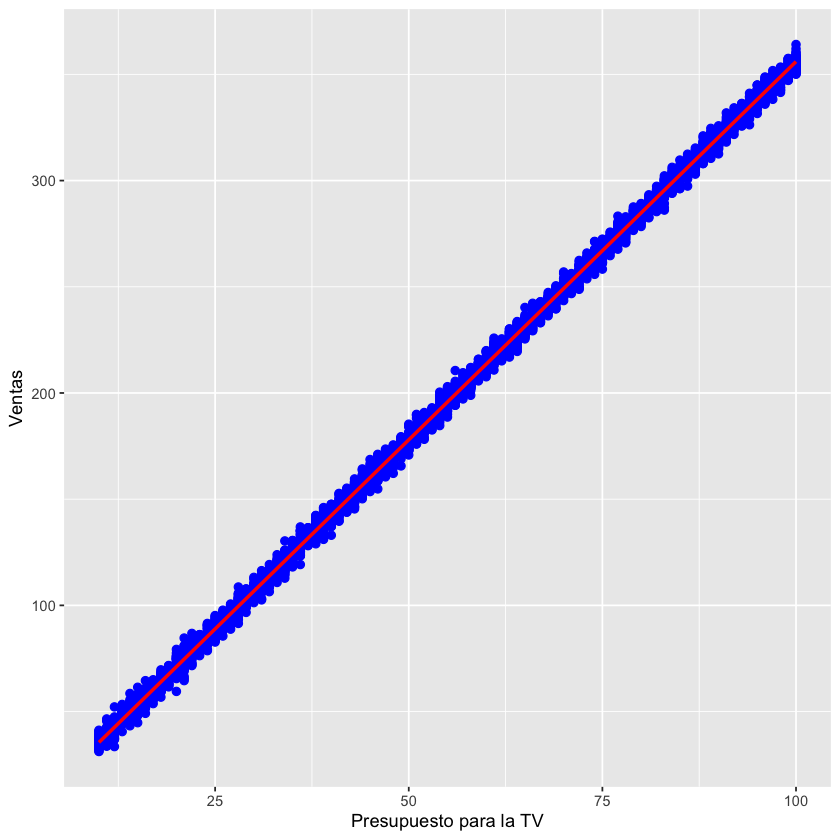

In [38]:
miGraf <- ggplot(canalesMkt, aes(TV, Sales))

miGraf +
    geom_point(size = 2, color = "blue") +
    geom_smooth(method = "lm", se = FALSE, color= "red") +
    labs("Relacion lineal ", x = "Presupuesto para la TV", y = "Ventas") 

Se cumple el supuesto de linealidad

# Pregunta 4

In [39]:
modelo <- lm(Sales ~ TV, data = canalesMkt)
canalesMkt$residuos <- rstandard(modelo)

In [40]:
head(canalesMkt)

,TV,TVCAT,Radio,Social_Media,Sales,Influencer,residuos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,16,Low,6.566231,2.907983,54.73276,Mega,-0.7187295
2,13,Low,9.237765,2.409567,46.67790,Mega,0.1732317
3,41,Med,15.886446,2.913410,150.17783,Macro,1.4542172
4,83,High,30.020028,6.922304,298.24634,Mega,0.9405284
5,15,Low,8.437408,1.405998,56.59418,Micro,1.1206756
6,29,Low,9.614382,1.027163,105.88915,Micro,0.9284804


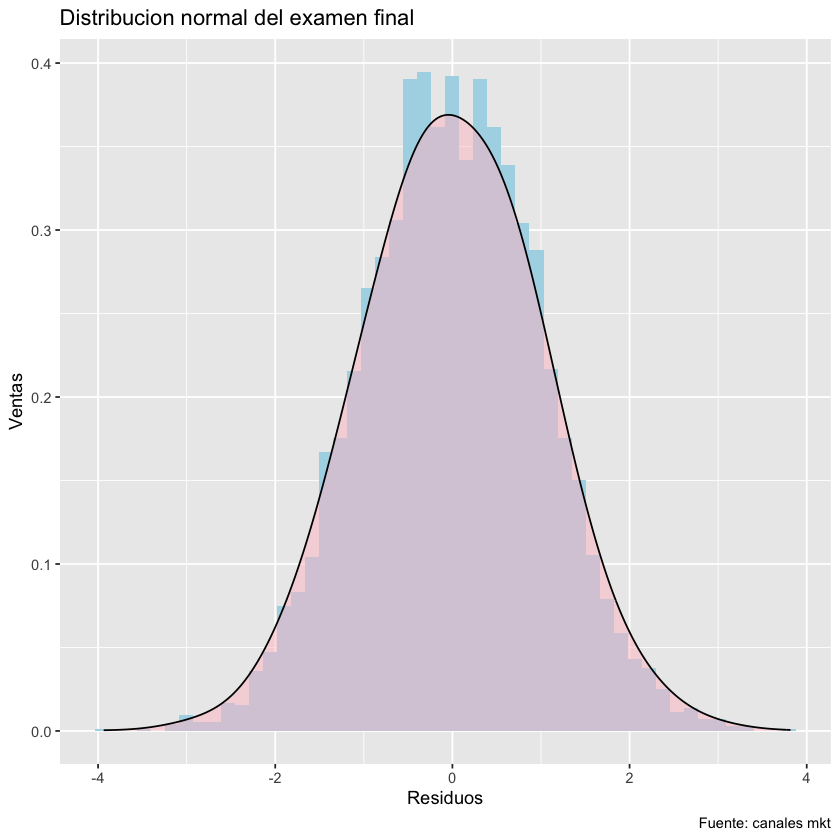

In [63]:
# Mostando histograma
res <- ggplot(canalesMkt, aes(residuos)) +
    geom_histogram(aes(y = ..density..),bins=50,fill= "lightblue") +
    geom_density(adjust = 2, fill = "pink", alpha = 0.5) +
    labs(
        title = "Distribucion normal del examen final",
        caption = "Fuente: canales mkt",
        x = "Residuos",
        y = "Ventas"
    )

res

No se llega a cumplir de todo el supuesto de normalidad